In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import wimprates as wr
assert wr.__version__ !='0.2.2'
wr.__version__

'0.3.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numericalunits as nu

In [5]:
from tqdm import tqdm

In [6]:
from scipy.integrate import quad as scipy_int

In [7]:
import pandas as pd

In [8]:
import scipy

In [9]:
import emcee
emcee.__version__

'3.0.0'

In [10]:
import corner

In [11]:
import time

# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

# Emcee #
<https://emcee.readthedocs.io/en/stable/tutorials/quickstart/>

In [12]:
def plot_spectrum(data, color = 'blue', label = 'label', linestyle = 'none'):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']),
                color = color,
                linestyle = linestyle,
                capsize = 2,
                marker = 'o',
                label = label
                )

## Distribution of the DM ##
First we need to make a DM-rate spectrum

In [13]:
stats_50 = dddm.MCMCStatModel("Xe")

stat_model::initialized for Xe detector. See print(stat_model) for default settings


In [14]:
stats = dddm.MCMCStatModel("Xe")

stat_model::initialized for Xe detector. See print(stat_model) for default settings


In [15]:
# stats.config['mw'] = 250

In [16]:
# stats.config['sigma'] = 0.1e-45

In [17]:
stats.set_benchmark(mw=25, sigma=1e-45)

re-evaluate benchmark


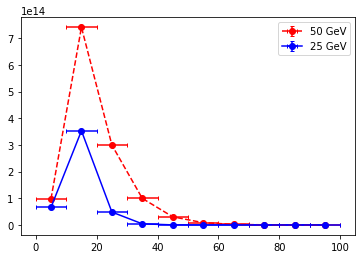

In [18]:
plot_spectrum(stats_50.check_spectrum(), 
              linestyle='--',
              color = 'red', label = "50 GeV")
plot_spectrum(stats.check_spectrum(), 
              linestyle='-',
              label = "%i GeV"%stats.config['mw'])
plt.legend()

In [19]:
# def get_SHMpp_priors():
#     """

#     :return: dictionary of priors, type and values
#     """
#     priors = \
#         {
#         'log_mass':
#             {'range': [0.1, 3], 'prior_type': 'flat'},
#         'log_cross_section':
#             {'range': [-46, -42], 'prior_type': 'flat'},
#         'density':
#             {'range': [0.001, 0.9], 'prior_type': 'gauss', 'mean': 0.55,
#              'std': 0.17},
#         'v_0':
#             {'range': [80, 380], 'prior_type': 'gauss', 'mean': 230,
#              'std': 3},
#         'v_esc':
#             {'range': [379, 709], 'prior_type': 'gauss', 'mean': 528,
#              'std': 24.5},
#         'k':
#             {'range': [0.5, 3.5], 'prior_type': 'flat'}
#         }
#     for key in priors.keys():
#         param = priors[key]
#         if param['prior_type'] == 'flat':
#             param['param'] = param['range']
#             param['dist'] = lambda x: dddm.flat_prior(x)
#         elif param['prior_type'] == 'gauss':
#             param['param'] = param['mean'], param['std']
#             param['dist'] = lambda x: dddm.gaus_prior(x)
#     return priors

In [20]:
# stats.config['prior'] = get_SHMpp_priors()

In [21]:
# stats.config['prior']

In [22]:
stats.nwalkers = 250
stats.nsteps = 150
stats.log

{'sampler': False, 'did_run': False, 'pos': False}

In [ ]:
start = time.time()
stats.run_emcee()
end = time.time()

C:\Users\Joran\programming\Anaconda3\envs\DD_DM\lib\site-packages\emcee\ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,
 15%|███████████▉                                                                     | 22/150 [07:32<38:09, 17.89s/it]

In [ ]:
end-start

In [ ]:
assert stats.log['did_run']

In [ ]:
stats.show_walkers()

In [ ]:
stats.show_corner()

## Full dimensionality ##

In [ ]:
stats_full = dddm.MCMCStatModel("Xe")

In [ ]:
# stats_full.config['prior'] = get_SHMpp_priors()
# stats_full.config['prior']

In [ ]:
# stats.config['mw'] = 250

In [ ]:
stats.set_benchmark(mw=stats.config['mw'], sigma=stats.config['sigma'])

In [ ]:
stats_full.nwalkers = stats.nwalkers
stats_full.nsteps = stats.nsteps
stats_full.log

In [ ]:
stats_full.log

In [ ]:
# for key in stats_full.log.keys():
#     stats_full.log[key] = False


In [ ]:
stats_full.fit_parameters = stats_full.known_parameters

In [ ]:
start = time.time()
stats_full.run_emcee()
end = time.time()

In [ ]:
end-start

In [ ]:
assert stats.log['did_run']

In [ ]:
stats_full.show_walkers()

In [ ]:
stats_full.show_corner()